

# Feature selection (II): Wrapper and embedded methods

See also: https://scikit-learn.org/stable/modules/feature_selection.html

# Feature selection using *wrapper* methods 
### The *wrapper* methods are based on selecting the variables that will work best for a given model. To do this we need a classification or regression model, and we will test all the combinations of variables one by one and in groups.
### We are going to experiment with this method with a simple regression problem where we will fit a least squares linear model. The problem will be generated with the `make_regression` function of scikit-learn, making sure to create a number of informative variables less than the total number of variables, as shown in the code below.
### We generate 100 samples of a regression problem with 4 input variables and one output variable. Of the 4 variables only 3 are needed to predict. In addition we add a small amount of noise to complicate the problem a bit.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_regression
# If we want the example to be illustrative we have to put n_informative < n_features
X, y = make_regression(n_samples=100, n_features=4, n_informative=3, n_targets=1, noise=0.01)

In [3]:
# Separate into training and test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

# We ensure that 'y' has dimension Nx1.
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

Xtrain.shape, Xtest.shape

((67, 4), (33, 4))

In [4]:
ytrain.shape, ytest.shape

((67, 1), (33, 1))

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(Xtrain, ytrain)

yp = model.predict(Xtest)
print('R^2', model.score(Xtest, ytest))
print('MSE', mean_squared_error(ytest, yp))
#print(model.coef_)

R^2 0.9999999895589607
MSE 0.00013752725390935274


Feature: 0, Score: 45.98202
Feature: 1, Score: -0.00119
Feature: 2, Score: 68.58307
Feature: 3, Score: 72.75802


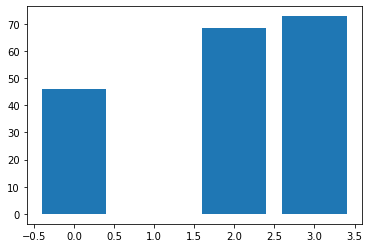

In [6]:
# get importance
importance = model.coef_.ravel()
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The scores suggest that the model found the three important features and marked the other feature with a zero coefficient, essentially removing them from the model.

This approach is an embedded method to select the best features based on the weigths asigned to each feature. It may also be used with `Ridge` and `ElasticNet` models in scikit learn. We see some examples later.

### We go now with the method of selection of variables itself.
### First we are going to try each variable one by one ...
#### Exercise:
Test the input variables in the LinearModel one by one. Check the results with the `fit`, `predict` and `score` functions.

Feature: 0
R^2 0.0766983758480484
MSE 12161.541977492732


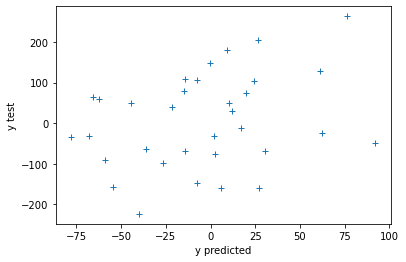

Feature: 1
R^2 -0.039494709896823244
MSE 13692.013767877143


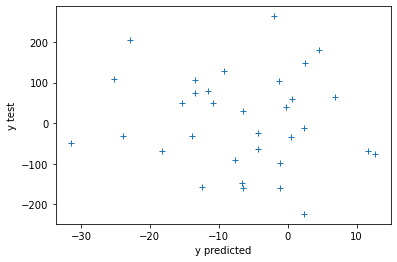

Feature: 2
R^2 0.3407385683148765
MSE 8683.658043973172


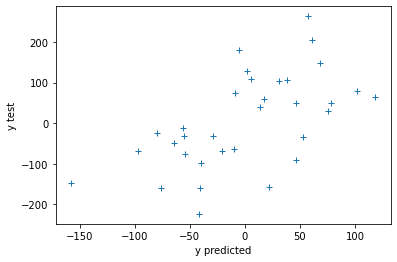

Feature: 3
R^2 0.6009327047585826
MSE 5256.433581366971


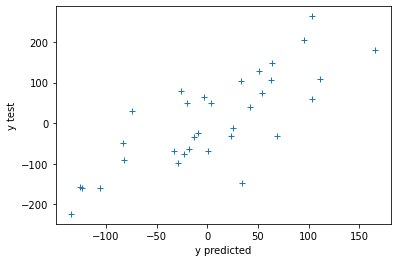

In [7]:
for i in range(Xtrain.shape[1]):
    model1 = LinearRegression()
    model1.fit(Xtrain[:, i, None], ytrain)
    yp1 = model1.predict(Xtest[:, i, None])
    print('Feature:', i)
    print('R^2', model1.score(Xtest[:, i, None], ytest))
    print('MSE', mean_squared_error(ytest, yp1))
    plt.plot(yp1,ytest,'+')
    plt.xlabel('y predicted')
    plt.ylabel('y test')
    plt.show()

### Now in groups of two ...
#### Exercise:
Now try all combinations of two variables. For this we will use `combinations` from the `itertools` library.

Features: (0, 1)
R^2 0.020579376862473686
MSE 12900.730065161057


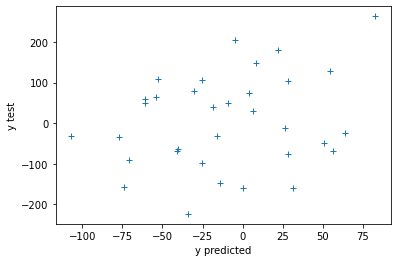

Features: (0, 2)
R^2 0.5661469612869536
MSE 5714.624348481755


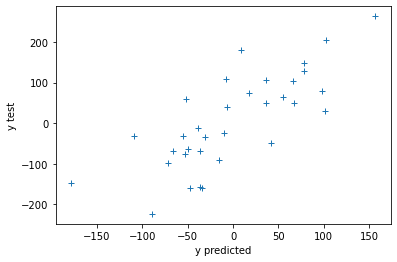

Features: (0, 3)
R^2 0.635322774638228
MSE 4803.45454666164


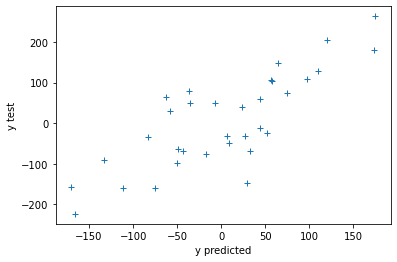

Features: (1, 2)
R^2 0.3437408085003276
MSE 8644.113144357712


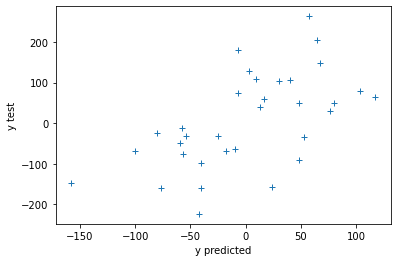

Features: (1, 3)
R^2 0.5842400921151214
MSE 5476.3052939981935


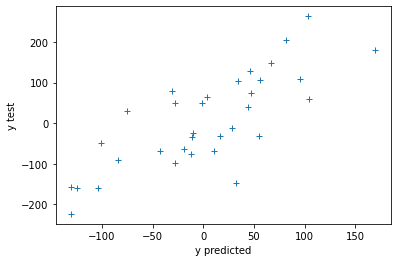

Features: (2, 3)
R^2 0.8417614206650853
MSE 2084.2865155879635


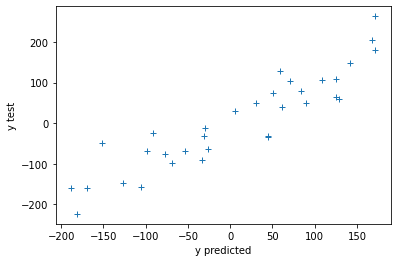

In [8]:
from itertools import combinations
for c in combinations(range(4), 2):
    model1 = LinearRegression()
    model1.fit(Xtrain[:, c], ytrain)
    yp1 = model1.predict(Xtest[:, c])
    print('Features:', c)
    print('R^2', model1.score(Xtest[:, c], ytest))
    print('MSE', mean_squared_error(ytest, yp1))
    plt.plot(yp1,ytest,'+')
    plt.xlabel('y predicted')
    plt.ylabel('y test')
    plt.show()

### And finally in groups of three...

Features: (0, 1, 2)
R^2 0.5587814594107497
MSE 5811.641247303991


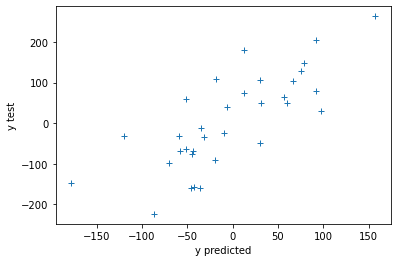

Features: (0, 1, 3)
R^2 0.6004208490356684
MSE 5263.175641272214


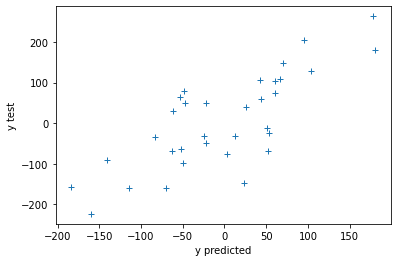

Features: (0, 2, 3)
R^2 0.9999999896113485
MSE 0.00013683721366285453


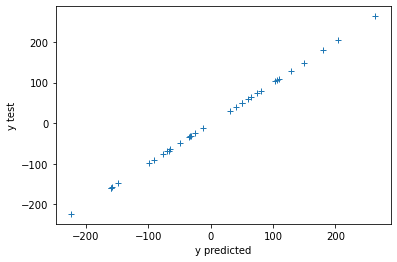

Features: (1, 2, 3)
R^2 0.8419176672018769
MSE 2082.228467853267


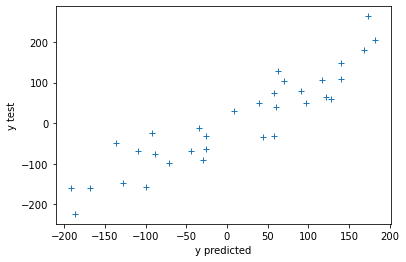

In [9]:
from itertools import combinations

for c in combinations(range(4), 3):
    model1 = LinearRegression()
    model1.fit(Xtrain[:, c], ytrain)
    yp1 = model1.predict(Xtest[:, c])
    print('Features:', c)
    print('R^2', model1.score(Xtest[:, c], ytest))
    print('MSE', mean_squared_error(ytest, yp1))
    plt.plot(yp1,ytest,'+')
    plt.xlabel('y predicted')
    plt.ylabel('y test')
    plt.show()

Features: [0, 2, 3]
R^2 0.9999999896113485
MSE 0.00013683721366285453


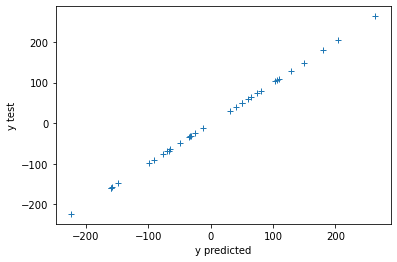

In [10]:
# Fit the best model based on the ranked features. 
vars = [0,2,3]

model1 = LinearRegression()
model1.fit(Xtrain[:, vars ], ytrain)
yp1 = model1.predict(Xtest[:, vars])
print('Features:', vars)
print('R^2', model1.score(Xtest[:, vars], ytest))
print('MSE', mean_squared_error(ytest, yp1))
plt.plot(yp1,ytest,'+')
plt.xlabel('y predicted')
plt.ylabel('y test')
plt.show()



In scikit-learn we have the `SequentialFeatureSelector` transformer that performs Sequential Feature Selection, which does this selection by adding or removing features (forward and backward selection).


### Sequential Feature Selection (forward and backward)

This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator. In the case of unsupervised learning, this Sequential Feature Selector looks only at the features (X), not the desired outputs (y).

In [11]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
# direction{‘forward’, ‘backward’}, default=’forward’

SFS1 = SFS(model, n_features_to_select=3, direction='forward')
SFS1 = SFS1.fit(X, y)
print('Features:', SFS1.get_support())



Features: [ True False  True  True]


In [12]:
# Exercise
# Try to see what happens when we do not select a number of features. 
# What number of features does it select and why? 
# Remember that in this example the number of relevant features should be 3 

Respuesta: El número por defecto es la mitad del número de características de los datos. Al tener 4, por eso es 2. Una razón para esto es que la implementación cuenta con ambas direcciones, por tanto un valor neutro es justamente la mitad de las variables.

#Feature selection using embedded methods

+ Tree-based algorithm like Decision Tree, RandomForest or ExtraTree, XGBoost
+  Regularization approach that includes Lasso(L1 regularization) and Ridge(L2 regularization) and Elastic Nets(L1 and L2)

### Recursive feature elimination (RFE)

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (`RFE`) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as `coef_`, `feature_importances_`) or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

`RFECV` performs RFE in a cross-validation loop to find the optimal number of features.

In [13]:
# RFE can be used with different supervised estimators, which provides information about feature importance
# RFE is used in this example with a linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

## create ranking among all features by selecting only one
#rfe = RFE(LinearRegression(), n_features_to_select=3)
rfe = RFE(LinearRegression())
rfe.fit(X, y)
rfe.ranking_

array([2, 3, 1, 1])

In [14]:
# evaluate RFE for regression with DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor())
rfe.fit(X, y)
rfe.ranking_

array([2, 3, 1, 1])

## Classification and regression trees (CART)
Decision tree algorithms like classification and regression trees (CART) provide importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

Feature: 0, Score: 0.11773
Feature: 1, Score: 0.01730
Feature: 2, Score: 0.35367
Feature: 3, Score: 0.51130


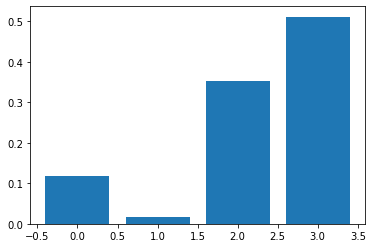

In [15]:
# CART Regression Feature Importance 

from sklearn.tree import DecisionTreeRegressor

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Random Forest Regression 
In scikit-learn we can use the Random Forest algorithm to obtain the importance of features using `RandomForestRegressor` and `RandomForestClassifier` for regression or classification, respectively.

The model provides a `feature_importances_` property that can be accessed to retrieve the relative importance scores for each input feature.

This approach can also be used with the bagging and extra trees algorithms.


Feature: 0, Score: 0.14494
Feature: 1, Score: 0.02227
Feature: 2, Score: 0.32045
Feature: 3, Score: 0.51234


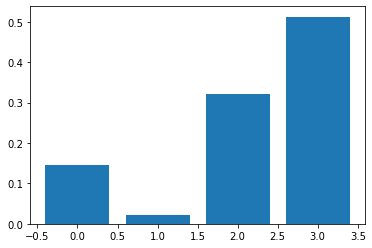

In [16]:
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## XGBoost Feature Importance

XGBoost is a library that provides an efficient and effective implementation of the stochastic gradient boosting algorithm.

This algorithm can be used with scikit-learn via the XGBRegressor and XGBClassifier classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

This algorithm is also provided via scikit-learn via the GradientBoostingClassifier and GradientBoostingRegressor classes and the same approach to feature selection can be used.

In [17]:
# Install xgboost
#!pip install xgboost

In [18]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.7.3


Feature: 0, Score: 0.06205
Feature: 1, Score: 0.00859
Feature: 2, Score: 0.31473
Feature: 3, Score: 0.61463


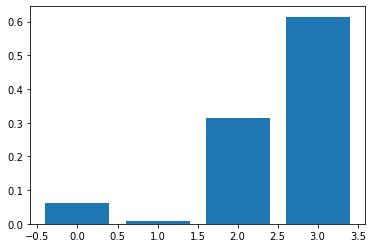

In [19]:
from xgboost import XGBRegressor
# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

##Permutation Feature Importance

Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used.

First, a model is fit on the dataset, such as a model that does not support native feature importance scores. Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

Feature: 0, Score: 3460.66720
Feature: 1, Score: 39.09820
Feature: 2, Score: 7544.05696
Feature: 3, Score: 8401.51642


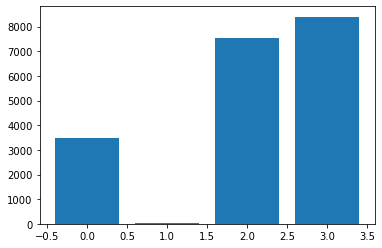

In [20]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [21]:
# Exercise
# All the examples seen here apply to a simple regression problem, but but almost the same methods have a version for classification.
# Select a dataset of your interest for classification and evaluate how the different methods work for that problem.
# If you don't have any, you can select one of the toy datasets from scikit learn
# https://scikit-learn.org/stable/datasets/toy_dataset.html


In [62]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer = load_breast_cancer()
X = breast_cancer.data
X_columns=breast_cancer.feature_names

y = breast_cancer.target

indices = np.random.choice(X.shape[0],50 , replace=False)  # Tenemos 30 variables y mas de 500 muestras, para hacerlo más interesante vamos a tomar muchos menos datos 

X=X[indices,:]
y=y[indices]


# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)


In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

yp = model.predict(X_test)
print('R^2', model.score(X_test, y_test))
print('MSE', mean_squared_error(y_test, yp))

R^2 0.6923076923076923
MSE 0.3076923076923077


Feature: 0, Score: -479.11345
Feature: 1, Score: 0.52429
Feature: 2, Score: 64.38925
Feature: 3, Score: 1.18435
Feature: 4, Score: -125.90312
Feature: 5, Score: 1095.90327
Feature: 6, Score: 597.74140
Feature: 7, Score: 739.76097
Feature: 8, Score: -2151.69026
Feature: 9, Score: -32325.04369
Feature: 10, Score: 1287.89697
Feature: 11, Score: -122.84226
Feature: 12, Score: -55.55196
Feature: 13, Score: -7.86363
Feature: 14, Score: 9468.49615
Feature: 15, Score: -8850.25125
Feature: 16, Score: 1068.67940
Feature: 17, Score: 19359.44810
Feature: 18, Score: -1489.68102
Feature: 19, Score: 8185.35509
Feature: 20, Score: -33.47753
Feature: 21, Score: 1.32240
Feature: 22, Score: 2.61418
Feature: 23, Score: -0.13179
Feature: 24, Score: -306.26152
Feature: 25, Score: 732.03472
Feature: 26, Score: -1240.75937
Feature: 27, Score: -3965.64379
Feature: 28, Score: 824.82719
Feature: 29, Score: 14590.30926


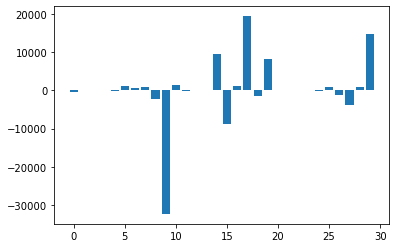

In [78]:
importance = model.coef_.ravel()
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Estos coeficientes dejan claro que estamos sobreajustando. Esto es por la gran cantidad de variables comparado con el número de muestras.

In [76]:
features = [9,17,29]

model1 = LinearDiscriminantAnalysis()
model1.fit(X_train[:, features], y_train)
yp1 = model1.predict(X_test[:, features])
print('Features:', features)
print('R^2', model1.score(X_test[:, features], y_test))
print('MSE', mean_squared_error(y_test, yp1))

Features: [9, 17, 29]
R^2 0.7692307692307693
MSE 0.23076923076923078


Solo tomando 3 variables hemos mejorado bastante los resultados, además de simplificar el modelo.

Por la relativa gran cantidad de variables ya no podemos probar todas las combinaciones de variables y evaluar sus precisiones ya que esto llevaría un gran tiempo de computación.

In [90]:

rfe = RFE(LinearDiscriminantAnalysis())
rfe.fit(X, y)
rfe.ranking_

array([ 6, 12,  9, 15,  1,  1,  1,  1,  1,  1,  4,  8, 10, 13,  1,  1,  1,
        1,  1,  3,  7, 11, 14, 16,  1,  5,  1,  1,  2,  1])

In [91]:

features = [i for i, x in enumerate(rfe.ranking_) if x == 1]

model1 = LinearDiscriminantAnalysis()
model1.fit(X_train[:, features], y_train)
yp1 = model1.predict(X_test[:, features])
print('Features:', features)
print('R^2', model1.score(X_test[:, features], y_test))
print('MSE', mean_squared_error(y_test, yp1))

Features: [4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 24, 26, 27, 29]
R^2 0.9230769230769231
MSE 0.07692307692307693


Vemos que tenemos bastantes variables con alta importancia, pero al tomar estas variables hemos mejorado sustancialmente el modelo.

A continuación probamos también a extraer características pero ahora utilizando árboles.

In [92]:
from sklearn.tree import DecisionTreeClassifier

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier())
rfe.fit(X, y)
rfe.ranking_

array([16, 15, 14, 13, 12, 11, 10,  1,  2,  1,  1,  1,  1,  1,  1,  4,  6,
        8,  9,  7,  5,  1,  1,  1,  1,  1,  1,  1,  1,  3])

In [93]:

features = [i for i, x in enumerate(rfe.ranking_) if x == 1]

model1 = DecisionTreeClassifier()
model1.fit(X_train[:, features], y_train)
yp1 = model1.predict(X_test[:, features])
print('Features:', features)
print('R^2', model1.score(X_test[:, features], y_test))
print('MSE', mean_squared_error(y_test, yp1))

Features: [7, 9, 10, 11, 12, 13, 14, 21, 22, 23, 24, 25, 26, 27, 28]
R^2 0.7692307692307693
MSE 0.23076923076923078


Ahora si que obtenemos diferencias entre ambos rankings, y observamos que funciona bastante mejor el LDA.

Feature: 0, Score: 0.05753
Feature: 1, Score: 0.00938
Feature: 2, Score: 0.02490
Feature: 3, Score: 0.05915
Feature: 4, Score: 0.00373
Feature: 5, Score: 0.00644
Feature: 6, Score: 0.05087
Feature: 7, Score: 0.10149
Feature: 8, Score: 0.00614
Feature: 9, Score: 0.00122
Feature: 10, Score: 0.01915
Feature: 11, Score: 0.00648
Feature: 12, Score: 0.01170
Feature: 13, Score: 0.05027
Feature: 14, Score: 0.01144
Feature: 15, Score: 0.00593
Feature: 16, Score: 0.00307
Feature: 17, Score: 0.00403
Feature: 18, Score: 0.00361
Feature: 19, Score: 0.00234
Feature: 20, Score: 0.08216
Feature: 21, Score: 0.05365
Feature: 22, Score: 0.11795
Feature: 23, Score: 0.07344
Feature: 24, Score: 0.00637
Feature: 25, Score: 0.01793
Feature: 26, Score: 0.02496
Feature: 27, Score: 0.18059
Feature: 28, Score: 0.00270
Feature: 29, Score: 0.00137


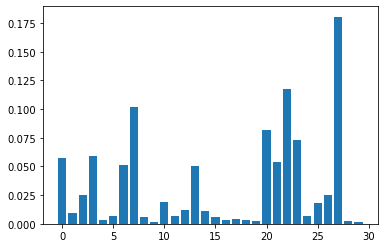

In [94]:
from sklearn.ensemble import RandomForestClassifier
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.03376
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.11987
Feature: 4, Score: 0.00192
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.45630
Feature: 8, Score: 0.02869
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.03849
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.31588
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00509


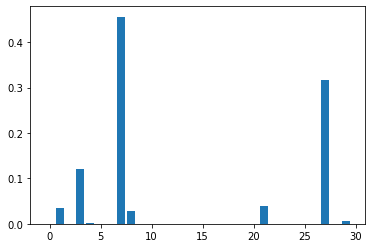

In [95]:
from xgboost import XGBClassifier
# define the model
model = XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.34054
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000


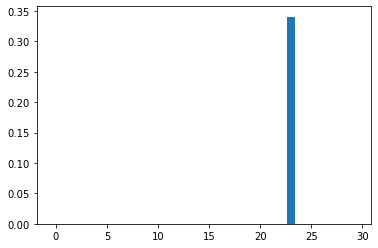

In [96]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()